In [27]:
data = """....#.....
.........#
..........
..#.......
.......#..
..........
.#..^.....
........#.
#.........
......#..."""

In [26]:
with open("AoC_D6_data.txt", "r") as f:
    data = f.read()

In [28]:
import matplotlib.pyplot as plt
import pandas as pd


In [29]:
# data

In [30]:
lab = pd.DataFrame([list(l) for l in data.split("\n")])
directions = ["^", ">", "v", "<"]
ini_pos = {"x":lab.columns[lab.isin(directions).any()][0], "y":lab.columns[lab.isin(directions).any(axis=1)][0]}
ini_dire = lab.loc[ini_pos["y"], ini_pos["x"]]
print("current position:",ini_pos, "current_direction:", ini_dire)
ini_lab_map = lab.copy()
ini_lab_map.loc[ini_pos["y"], ini_pos["x"]] = "."
ini_lab_path = ini_lab_map.copy()
ini_lab_map

current position: {'x': 4, 'y': 6} current_direction: ^


,0,1,2,3,4,5,6,7,8,9
0,.,.,.,.,#,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.,#
2,.,.,.,.,.,.,.,.,.,.
3,.,.,#,.,.,.,.,.,.,.
4,.,.,.,.,.,.,.,#,.,.
5,.,.,.,.,.,.,.,.,.,.
6,.,#,.,.,.,.,.,.,.,.
7,.,.,.,.,.,.,.,.,#,.
8,#,.,.,.,.,.,.,.,.,.
9,.,.,.,.,.,.,#,.,.,.


In [31]:
def next_step(pos, dire, lab_path, lab_map):
    next_pos = pos.copy()
    lab_path = lab_path.copy()
    if dire == "^":
        next_pos["y"] = next_pos["y"]-1
    elif dire == ">":
        next_pos["x"] = next_pos["x"]+1
    elif dire == "v":
        next_pos["y"] = next_pos["y"]+1
    elif dire == "<":
        next_pos["x"] = next_pos["x"]-1
        
    if (next_pos["y"] in [-1, len(lab_map.index)]) | (next_pos["x"] in [-1, len(lab_map.columns)]) :
        lab_path.loc[pos["y"], pos["x"]] = lab_path.loc[pos["y"], pos["x"]].lstrip('.') + dire
        return next_pos, dire, lab_path, "out"
    # ONLY FOR PART 2
    elif dire in lab_path.loc[next_pos["y"], next_pos["x"]]:
        return next_pos, dire, lab_path, "loop"
    # ###############
    elif lab_map.loc[next_pos["y"], next_pos["x"]] == "#":
        if dire == "^":
            next_dire = ">"
        elif dire == ">":
            next_dire = "v"
        elif dire == "v":
            next_dire = "<"
        elif dire == "<":
            next_dire = "^"
        next_pos = pos
        finished = "turning"
        lab_path.loc[pos["y"], pos["x"]] = lab_path.loc[pos["y"], pos["x"]].lstrip('.') + dire
    else:
        lab_path.loc[pos["y"], pos["x"]] = lab_path.loc[pos["y"], pos["x"]].lstrip('.') + dire
        next_dire = dire
        finished = f"moving {next_dire}"
    return next_pos, next_dire, lab_path, finished

In [32]:
def check_path(ini_lab_map):
    lab_map = ini_lab_map.copy()
    lab_path = ini_lab_map.copy()
    pos = ini_pos.copy()
    dire = ini_dire
    finished = "start"
    while finished not in ["out", "loop"]:
        pos, dire, lab_path, finished = next_step(pos, dire, lab_path, lab_map)
        # plot_path(lab_parcourt, pos)
    return finished, lab_path


In [33]:
finished, lab_path = check_path(ini_lab_map)
print(finished)
print(lab_path.applymap(lambda x: (">" in x)|("v" in x)|("<" in x)|("^" in x)).sum().sum())

out
41


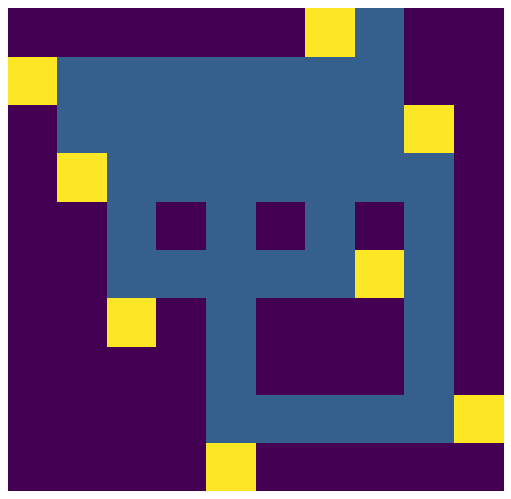

In [34]:
def plot_path(lab_path, pos=None):
    lab_path_plot = lab_path.applymap(lambda x: x[0]).replace({".":0, "#":10, ">":3, "v":3, "<":3, "^":3})
    for c in lab_path_plot.columns:
        lab_parcourt_plot[c] = pd.to_numeric(lab_parcourt_plot[c] )
    if pos is not None:
        lab_parcourt_plot.loc[pos['y'], pos['x']] = 7
    plt.figure(figsize=(8, 8), dpi=80)
    plt.axis('off')
    plt.pcolor(lab_parcourt_plot)
    plt.show()
plot_parcourt(lab_path)

In [36]:
# print(ini_lab_map)
last_path = lab_path.copy()
last_path.loc[ini_pos["y"], ini_pos["x"]] = "."
print(last_path)
# print("###########")
loop_count = 0
tot = last_path.applymap(lambda x: (">" in x)|("v" in x)|("<" in x)|("^" in x)).sum().sum()
i = 1
for x in last_path.columns:
    for y in last_path.index:
        p = last_path.loc[y, x]
        if (">" in p)|("v" in p)|("<" in p)|("^" in p):
            # test problematic path
            # if i != 2927:
            #     i+=1
            #     continue
            lab_map_for_test = ini_lab_map.copy()
            lab_map_for_test.loc[y, x] = "#"
            finished, lab_path_test = check_path(lab_map_for_test)
            print(i, "/", tot, finished)
            if finished == "loop":
                loop_count+=1
            i+=1
print(loop_count)
        

   0   1   2  3   4  5   6   7   8  9
0  .   .   .  .   #  .   .   .   .  .
1  .   .   .  .  ^>  >   >   >  >v  #
2  .   .   .  .   ^  .   .   .   v  .
3  .   .   #  .   ^  .   .   .   v  .
4  .   .  ^>  >  ^>  >  >v   #   v  .
5  .   .   ^  .   ^  .   v   .   v  .
6  .   #  <^  <   .  <  <v   <  v<  .
7  .  ^>   >  >   >  >  v>  >v   #  .
8  #  <^   <  <   <  <  v<   v   .  .
9  .   .   .  .   .  .   #   v   .  .
1 / 40 out
2 / 40 loop
3 / 40 out
4 / 40 out
5 / 40 out
6 / 40 out
7 / 40 out
8 / 40 out
9 / 40 loop
10 / 40 out
11 / 40 loop
12 / 40 out
13 / 40 out
14 / 40 out
15 / 40 out
16 / 40 out
17 / 40 out
18 / 40 out
19 / 40 out
20 / 40 out
21 / 40 out
22 / 40 out
23 / 40 out
24 / 40 out
25 / 40 out
26 / 40 out
27 / 40 out
28 / 40 loop
29 / 40 out
30 / 40 out
31 / 40 out
32 / 40 loop
33 / 40 out
34 / 40 loop
35 / 40 out
36 / 40 out
37 / 40 out
38 / 40 out
39 / 40 out
40 / 40 out
6


In [ ]:
lab_map

In [ ]:
### 2926 / 4758 loop